In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Helper Functions

In [2]:
def get_datetimes(df):
    """
    Takes a dataframe:
    returns only those column names that can be converted into datetime objects 
    as datetime objects.
    NOTE number of returned columns may not match total number of columns in passed dataframe
    """
    
    return pd.to_datetime(df.columns.values[7:], format='%Y-%m')


def melt_data(df):
    """
    Takes the zillow_data dataset in wide form or a subset of the zillow_dataset.  
    Returns a long-form datetime dataframe 
    with the datetime column names as the index and the values as the 'values' column.
    
    If more than one row is passes in the wide-form dataset, the values column
    will be the mean of the values from the datetime columns in all of the rows.
    """
    
    melted = pd.melt(df, id_vars=['RegionName', 'RegionID', 'SizeRank', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted.groupby('time').aggregate({'value':'mean'})

# Data

In [3]:
#Loading our dataset
df = pd.read_csv('data/zillow_data.csv')

In [4]:
#Observing what our dataset looks like
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14718,58333,1338,Ashfield,MA,Greenfield Town,Franklin,14719,94600.0,94300.0,94000.0,...,216800,217700,218600,218500,218100,216400,213100,209800,209200,209300
14719,59107,3293,Woodstock,NH,Claremont,Grafton,14720,92700.0,92500.0,92400.0,...,202100,208400,212200,215200,214300,213100,213700,218300,222700,225800
14720,75672,40404,Berea,KY,Richmond,Madison,14721,57100.0,57300.0,57500.0,...,121800,122800,124600,126700,128800,130600,131700,132500,133000,133400
14721,93733,81225,Mount Crested Butte,CO,NaN,Gunnison,14722,191100.0,192400.0,193700.0,...,662800,671200,682400,695600,695500,694700,706400,705300,681500,664400


# Data Analysis

## Narrowing the scope of our project

Our client is looking to purchase a home in Florida. We want to identify the best 5 Zip Codes which we believe will have the highest ROI after 3 years of purchase. i.e. We want the zipcodes that we believe will appreciate the most in value. These predictions will be mades using our Time Series model.

### Looking at our Florida data

In [5]:
#Dataframe containing only zips from Florida

florida =  df[df['State']=='FL']

In [6]:
#Observing what our Florida dataset looks like

florida

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
11,71831,32162,The Villages,FL,The Villages,Sumter,12,101000.0,100700.0,100400.0,...,249900,250400,249900,248700,247500,247100,246800,247500,249800,251800
60,72463,33160,Sunny Isles Beach,FL,Miami-Fort Lauderdale,Miami-Dade,61,337300.0,337900.0,338300.0,...,1466200,1471000,1485400,1497700,1504200,1507600,1495800,1466200,1443900,1432300
82,72363,33025,Miramar,FL,Miami-Fort Lauderdale,Broward,83,111600.0,111700.0,111800.0,...,283500,286100,287800,288800,289700,291000,292500,294200,296400,298200
83,72578,33411,Royal Palm Beach,FL,Miami-Fort Lauderdale,Palm Beach,84,126800.0,126800.0,126800.0,...,297400,299300,301400,303300,304900,307100,309800,311700,312600,313100
84,72442,33139,Miami Beach,FL,Miami-Fort Lauderdale,Miami-Dade,85,480200.0,480700.0,481200.0,...,2917100,2925700,2942400,2958300,2946300,2912900,2900900,2923300,2933600,2914100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14250,73224,34797,Yalaha,FL,Orlando,Lake,14251,86100.0,86800.0,87400.0,...,174900,177100,179100,181500,184200,186200,187200,189000,191900,193500
14262,71852,32193,Welaka,FL,Palatka,Putnam,14263,53800.0,54100.0,54300.0,...,94400,99000,100800,101000,103000,105400,104900,106100,112600,118300
14315,72384,33051,Key Colony Beach,FL,Key West,Monroe,14316,202200.0,202800.0,203400.0,...,570200,564800,561100,557300,552300,545100,542300,551500,570900,585300
14558,72865,33855,Lake Wales,FL,Lakeland,Polk,14559,NaN,NaN,NaN,...,130400,131500,134800,137900,139400,140000,140000,140300,141900,143000


## Number of ZipCodes for each Metro in Florida

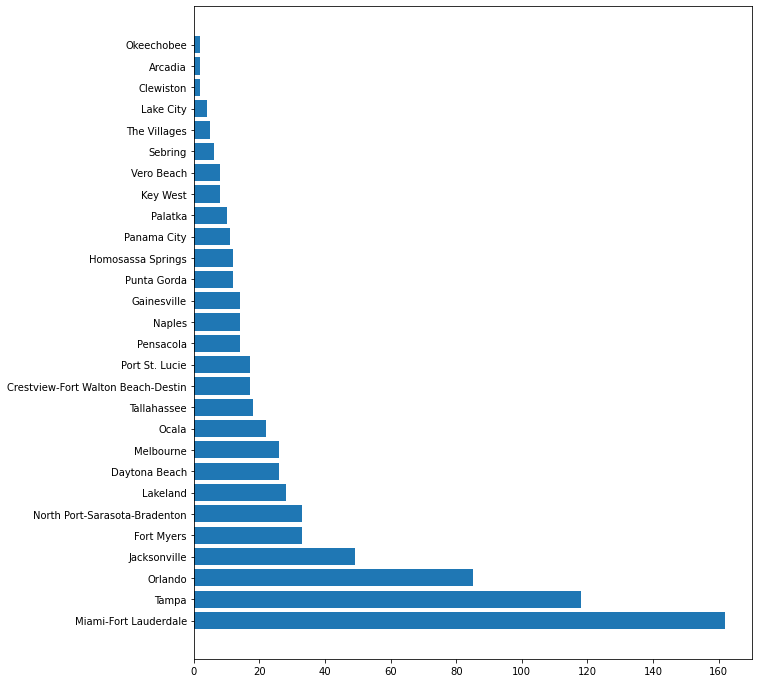

In [7]:
#Visualizing the value counts of zipcodes in each metro region in Florida

fig, ax = plt.subplots(figsize=(10,12))

y = [a for a in florida['Metro'].value_counts()]

x = [a for a in florida['Metro'].value_counts().keys()]

ax.barh(x,y);

We can see above that the Miami-Fort Lauderdale region has the highest number of zipcodes.

## Selecting a ZipCode to build our Time Series model on

We want to build a Time Series model to predict the future ROI for each zip code in Florida. But first, we will select one specific zipcode to build our time series model on. For this purpose, we decided to find the zipcode that has seen the highest growth in the 5 years since our last recorded date - April, 2018. i.e. We will find the zipcode which has grown the most between April,2013 and April,2018.

In [8]:
#Creating a new column that shows the 5 year increase in value. From April, 2013 to April, 2018.

florida['5 yr ROI'] = None
florida['5 yr ROI'] = florida['2018-04'].apply(lambda x : x-florida['2013-04'])

<ipython-input-8-59cb7a160495>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida['5 yr ROI'] = None
<ipython-input-8-59cb7a160495>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  florida['5 yr ROI'] = florida['2018-04'].apply(lambda x : x-florida['2013-04'])


In [9]:
#Identifying the ZipCode that grew the most between April,2013 and April,2018.

roi_df = florida[['RegionName','5 yr ROI']].sort_values('5 yr ROI',ascending = False)

print(f'Highest growing Zipcode since April 2013 is : {int(roi_df.iloc[0][0])}')

Highest growing Zipcode since April 2013 is : 33480


We will run our first Time Series model on the ZipCode- 33480 to predict what its future value will be. Then we can run a similar model on other zipcodes in the state to identify which 5 zipcodes have the highest predicted ROI.

In [10]:
#Dataframe containining historical prices of the 33480 Zip Code.

zip33480 = df[df['RegionName']==33480]

In [11]:
# Time Series dataframe of 33480 Zip Code prices

series33480 = melt_data(zip33480)

In [12]:
#Observing our Time Series dataframe

series33480

,value
time,
1996-04-01,958400.0
1996-05-01,958100.0
1996-06-01,957900.0
1996-07-01,957800.0
1996-08-01,958000.0
...,...
2017-12-01,4609000.0
2018-01-01,4626500.0
2018-02-01,4661200.0


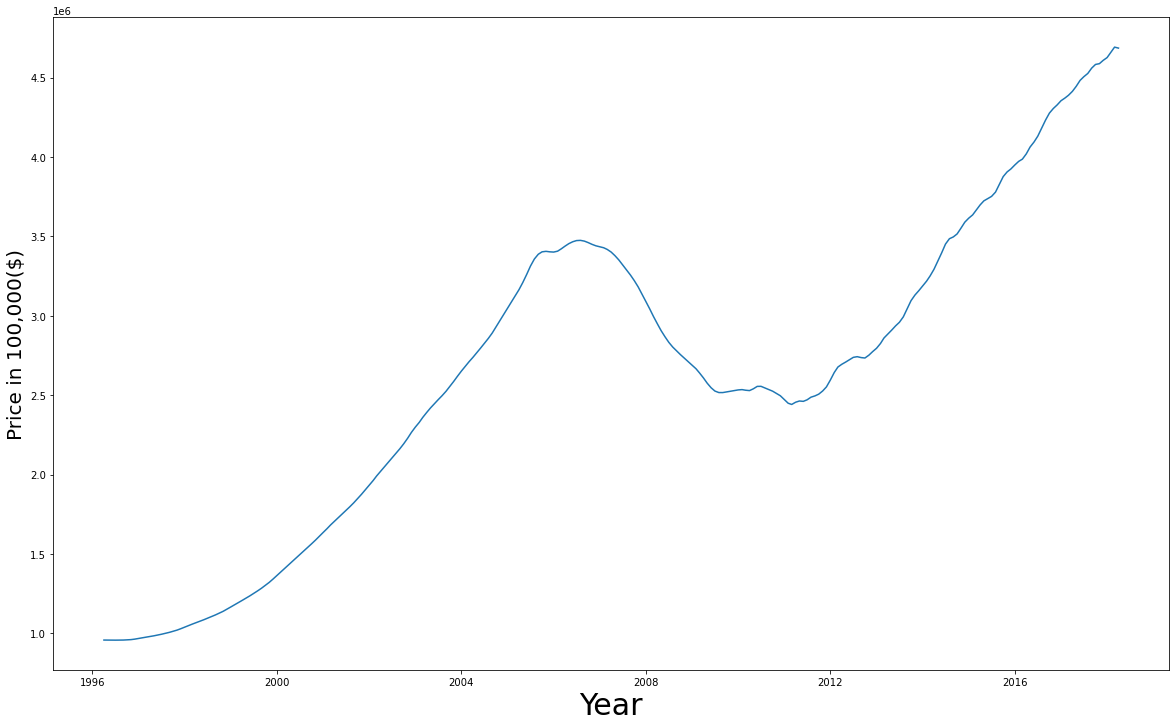

In [13]:
#Visualizing our Time Series Data

fig, ax = plt.subplots(figsize=(20,12))
ax.plot(series33480)

ax.set_xlabel('Year', fontsize=30)
ax.set_ylabel('Price in 100,000($)',fontsize=20);

We can see from above that after several years of growth in the early years of the 21st Century, prices seemed to have likely fallen due to the economic crisis that emerged in 2008. Since 2012 though, there has been a dramatic increase in prices.